In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib

In [111]:
final =pd.read_csv('final1.csv')

<Axes: xlabel='Energy class', ylabel='Count'>

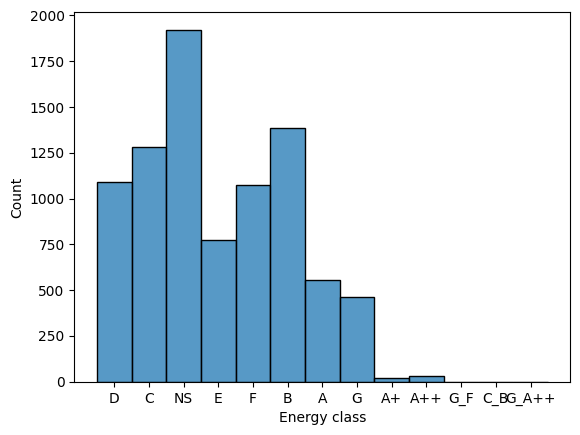

In [112]:
sns.histplot(final['Energy class'], kde=False)

Text(0.5, 1.0, 'price vs energy class')

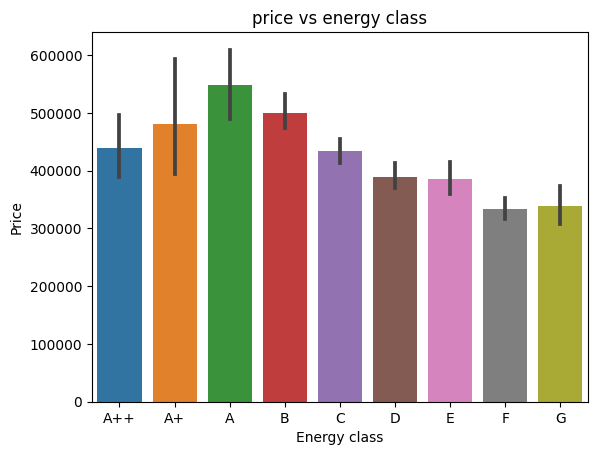

In [113]:
#sns.FacetGrid(final, )

sns.barplot(x='Energy class', y='Price', data=final, order=['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('price vs energy class')

In [114]:
sns.scatterplot(x='Price', y='Heating type', data=final, hue='province')
plt.title('cons year vs province')

Text(0.5, 1.0, 'cons year vs province')

Error in callback <function flush_figures at 0x00000205F6495800> (for post_execute):


KeyboardInterrupt: 

In [ ]:
final['Energy class'].value_counts()

Energy class
NS       1922
B        1387
C        1282
D        1090
F        1076
E         775
A         558
G         463
A++        31
A+         23
G_F         1
C_B         1
G_A++       1
Name: count, dtype: int64

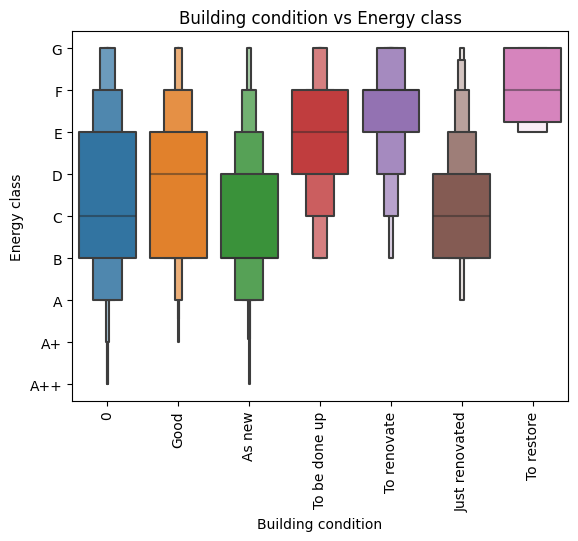

In [152]:
final['Energy class'] = final['Energy class'].replace({'A++': 1, 'A+': 2, 'A': 3, 'B': 4, 'C': 5, 'D': 6, 'E': 7, 'F': 8, 'G': 9})
final['Energy class'] = pd.to_numeric(final['Energy class'], errors='coerce')

sns.boxenplot(x='Building condition', y='Energy class', data=final, showfliers=False)
plt.xticks(rotation='vertical')

new_labels = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
plt.gca().set_yticks(range(1, 10))
plt.gca().set_yticklabels(new_labels)

plt.title('Building condition vs Energy class')
plt.show()

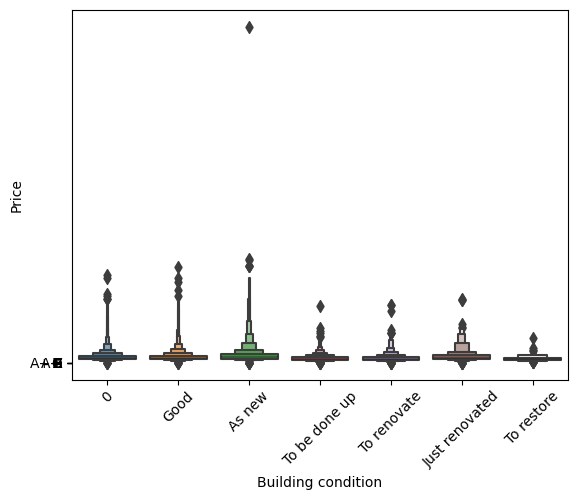

In [155]:
sns.boxenplot(x='Building condition', y='Price', data=final)

new_labels = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
plt.gca().set_yticks(range(1, 10))
plt.gca().set_yticklabels(new_labels)

plt.xticks(rotation=45)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'As new'),
  Text(3, 0, 'To be done up'),
  Text(4, 0, 'To renovate'),
  Text(5, 0, 'Just renovated'),
  Text(6, 0, 'To restore')])

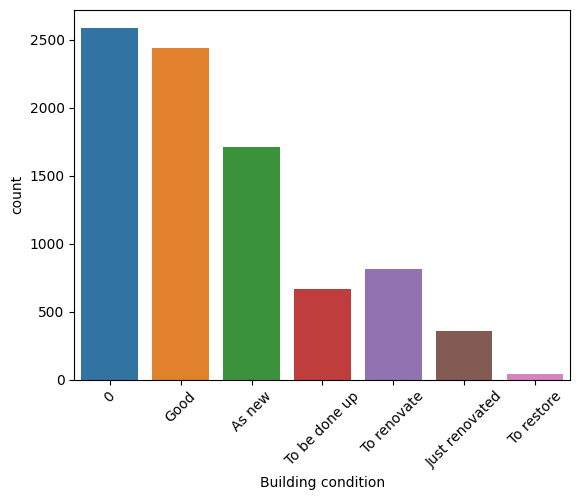

In [ ]:
sns.countplot(x='Building condition', data=final )
plt.xticks(rotation=45)

<Axes: xlabel='Surface of the plot', ylabel='Count'>

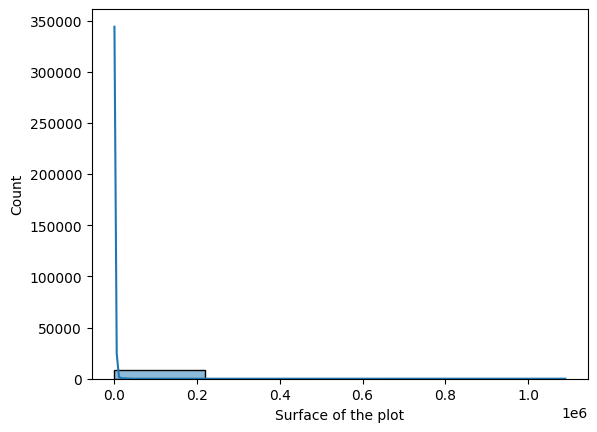

In [ ]:
sns.histplot(final['Surface of the plot'], kde=True, bins = 5)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

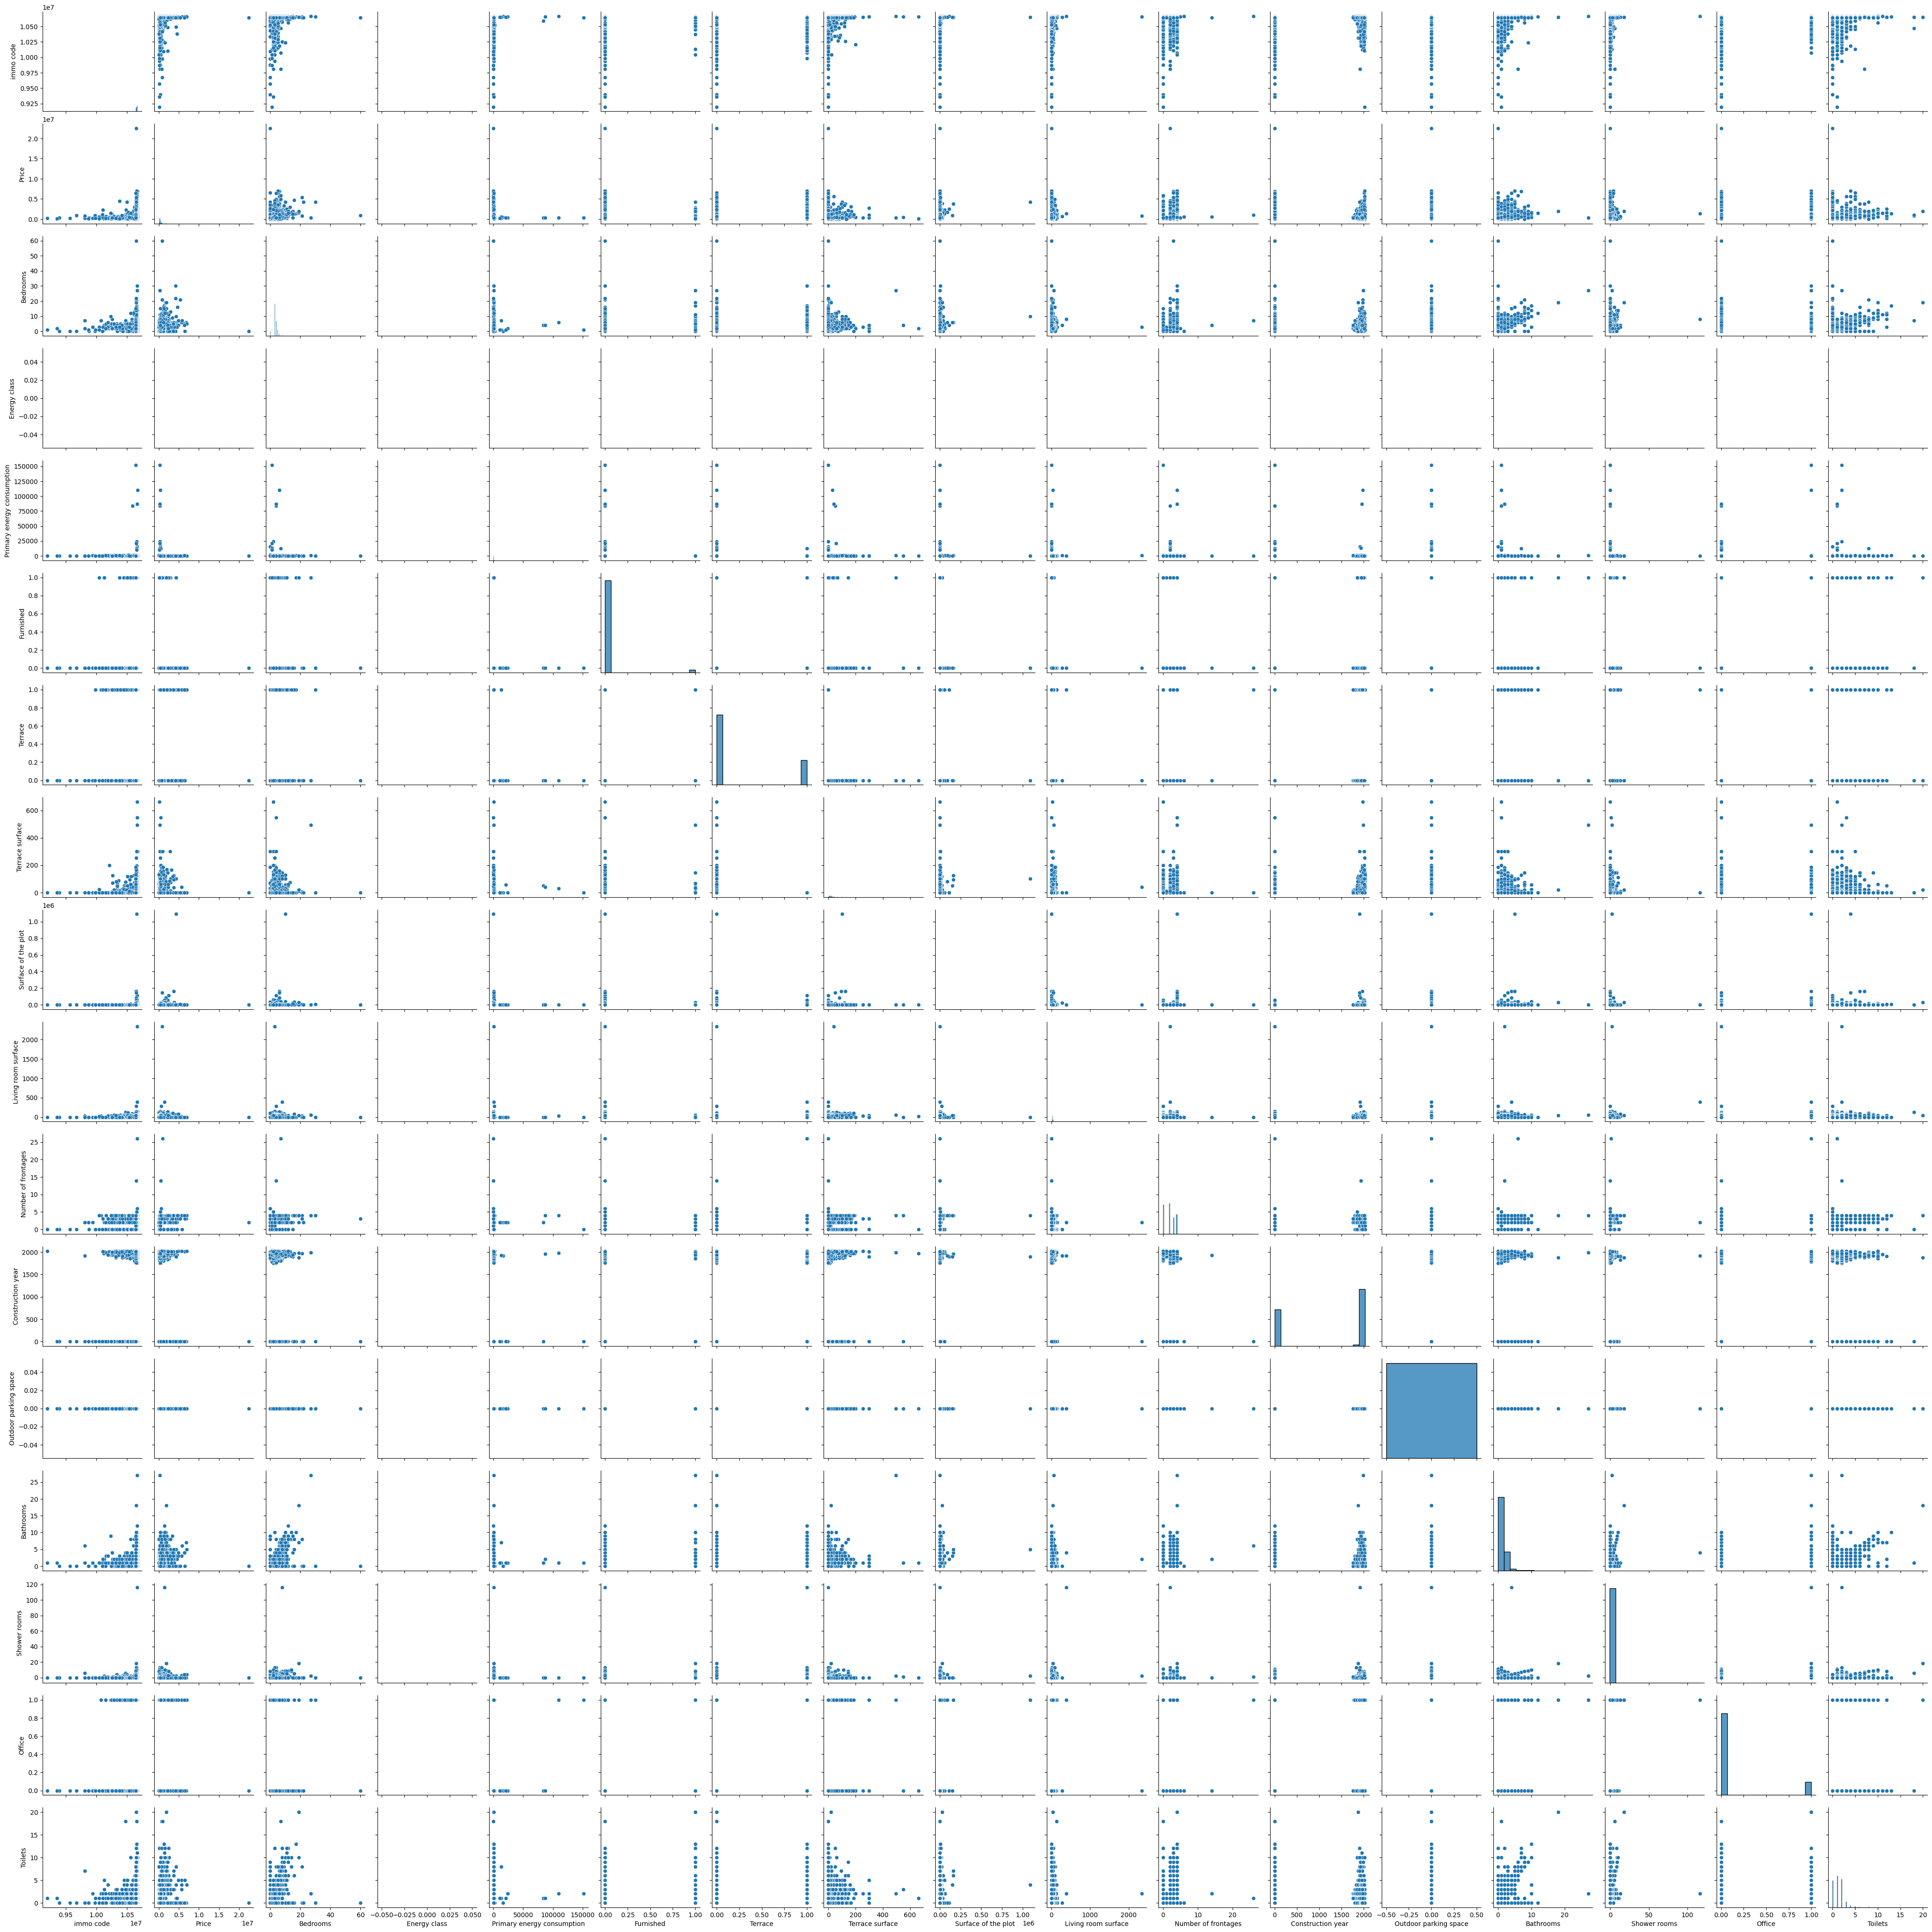

In [ ]:
sns.pairplot( data=final )
plt.xticks(rotation=45)

<Axes: xlabel='Price', ylabel='Surface of the plot'>

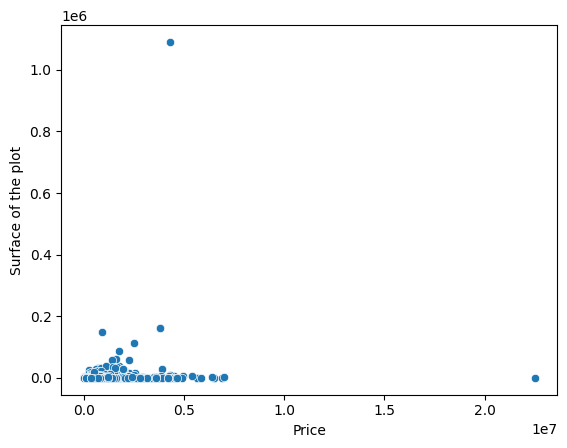

In [ ]:
surface = final.dropna(subset=['Surface of the plot'])
sns.scatterplot(x=surface['Price'], y=surface['Surface of the plot'],)

In [149]:
#final['Surface of the plot'] = final['Surface of the plot'].drop(1090481)

final['Surface of the plot'].sort_values().value_counts()

Surface of the plot
0          3853
200          35
100          33
160          28
150          27
           ... 
1331          1
1333          1
1335          1
1337          1
1090481       1
Name: count, Length: 1649, dtype: int64

<Axes: xlabel='Price', ylabel='Surface of the plot'>

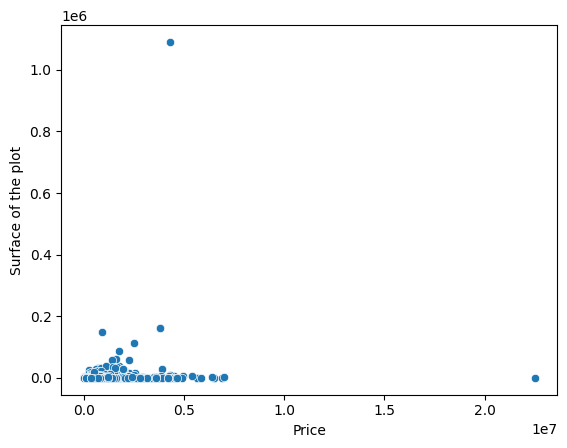

In [142]:
sns.scatterplot(x='Price', y='Surface of the plot', data=final)